# Include

In [2]:
import pandas as pd
import requests
import json
from tqdm import tqdm
from time import sleep
import glob
import datetime
import matplotlib.pyplot as plt
import pytz
import math

from collections import Counter

import numpy as np
import scipy.stats as stats
from wordcloud import WordCloud, STOPWORDS
from sklearn.cluster import DBSCAN
import nltk
import re
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
import ast
from pprint import pprint

from ast import literal_eval
from datetime import timezone
pd.set_option('display.max_columns', 500)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
from google.colab import drive
drive.mount('/content/drive' , force_remount=True)

Mounted at /content/drive


# INCLUDE CSV

In [8]:
TWITTER_DF = pd.read_csv('/content/drive/MyDrive/SEM 8/CS328/Project/Data/Twitter_Features_Filtered.csv' , index_col=None, header=0, lineterminator='\n')
# TWITTER_DF.drop(['avg_selling_price'], axis=1, inplace=True)
TWITTER_COLUMNS = list(TWITTER_DF.columns)
TWITTER_DF

,followers_count_mean,followers_count_median,followers_count_min,followers_count_max,friends_count_mean,friends_count_median,friends_count_min,friends_count_max,listed_count_mean,listed_count_median,listed_count_min,listed_count_max,created_at_user_mean,created_at_user_median,created_at_user_min,created_at_user_max,favourites_count_mean,favourites_count_median,favourites_count_min,favourites_count_max,geo_enabled,verified,statuses_count_mean,statuses_count_median,statuses_count_min,statuses_count_max,created_at_tweet_mean,created_at_tweet_median,created_at_tweet_min,created_at_tweet_max,day_mean,day_median,day_min,day_max,hour_mean,hour_median,hour_min,hour_max,video_mean,video_median,video_min,video_max,nlikes_mean,nlikes_median,nlikes_min,nlikes_max,nreplies_mean,nreplies_median,nreplies_min,nreplies_max,nretweets_mean,nretweets_median,nretweets_min,nretweets_max,avg_selling_price,personal_score_mean,personal_score_median,personal_score_min,personal_score_max,number_of_hashtags_mean,number_of_hashtags_median,number_of_hashtags_min,number_of_hashtags_max,number_of_cashtags_mean,number_of_cashtags_median,number_of_cashtags_min,number_of_cashtags_max,number_of_photos_mean,number_of_photos_median,number_of_photos_min,number_of_photos_max,number_of_urls_mean,number_of_urls_median,number_of_urls_min,number_of_urls_max,has_nft,has_crypto,number_of_tweets,permalink
0,334.00,334.0,334,334,1368.00,1368.0,1368,1368,2.0,2.0,2,2,1.599088e+09,1.599088e+09,1.599088e+09,1.599088e+09,109.00,109.0,109,109,0,0,97.00,97.0,97,97,1.616539e+12,1.616539e+12,1.616539e+12,1.616539e+12,3.00,3.0,3,3,4.00,4.0,4,4,0.0,0.0,0,0,1.00,1.0,1,1,0.00,0.0,0,0,0.0,0.0,0,0,0.00,0.75,0.75,0.75,0.75,2.00,2.0,2,2,0.0,0.0,0,0,0.0,0.0,0,0,1.00,1.0,1,1,0,0,1,https://opensea.io/assets/0x005c1cfc36e5ec711b...
1,2901.00,2901.0,2901,2901,3027.00,3027.0,3027,3027,19.0,19.0,19,19,1.480467e+09,1.480467e+09,1.480467e+09,1.480467e+09,10826.00,10826.0,10826,10826,1,0,3035.00,3035.0,3035,3035,1.616526e+12,1.616526e+12,1.616526e+12,1.616526e+12,3.00,3.0,3,3,0.00,0.0,0,0,0.0,0.0,0,0,8.00,8.0,8,8,2.00,2.0,2,2,1.0,1.0,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,1.00,1.0,1,1,0,0,1,https://opensea.io/assets/0x005c1cfc36e5ec711b...
2,1627.00,1627.0,1627,1627,908.00,908.0,908,908,16.0,16.0,16,16,1.235665e+09,1.235665e+09,1.235665e+09,1.235665e+09,5363.00,5363.0,5363,5363,0,0,1651.00,1651.0,1651,1651,1.611945e+12,1.611945e+12,1.611936e+12,1.611954e+12,5.50,5.5,5,6,11.50,11.5,2,21,0.0,0.0,0,0,1.50,1.5,0,3,0.00,0.0,0,0,0.0,0.0,0,0,11768.12,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,1.00,1.0,1,1,0,0,2,https://opensea.io/assets/0x005efb3633638dd0dd...
3,76.00,76.0,76,76,20.00,20.0,20,20,1.0,1.0,1,1,1.515757e+09,1.515757e+09,1.515757e+09,1.515757e+09,12.00,12.0,12,12,0,0,16.00,16.0,16,16,1.616886e+12,1.616886e+12,1.616886e+12,1.616886e+12,7.00,7.0,7,7,4.00,4.0,4,4,0.0,0.0,0,0,0.00,0.0,0,0,0.00,0.0,0,0,0.0,0.0,0,0,0.00,1.75,1.75,1.75,1.75,0.00,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,1.00,1.0,1,1,0,0,1,https://opensea.io/assets/0x0076b645920716be2a...
4,47.00,47.0,47,47,215.00,215.0,215,215,4.0,4.0,4,4,1.553787e+09,1.553787e+09,1.553787e+09,1.553787e+09,96.00,96.0,96,96,0,0,320.00,320.0,320,320,1.616014e+12,1.616014e+12,1.616014e+12,1.616014e+12,4.00,4.0,4,4,2.00,2.0,2,2,0.0,0.0,0,0,1.00,1.0,1,1,0.00,0.0,0,0,0.0,0.0,0,0,1175.19,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,1.00,1.0,1,1,0,0,1,https://opensea.io/assets/0x00c719960bfcb4286d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62992,329.00,329.0,178,480,264.00,264.0,229,299,3.5,3.5,0,7,1.578233e+09,1.578233e+09,1.539719e+09,1.616747e+09,532.50,532.5,295,770,0,0,438.50,438.5,217,660,1.616763e+12,1.616763e+12,1.616676e+12,1.616849e+

In [ ]:
print(TWITTER_DF.info(verbose=True))

In [9]:
OPENSEA_DF = pd.read_csv('/content/drive/MyDrive/SEM 8/CS328/Project/Data/Opensea_Features_Filtered.csv' , index_col=None, header=0, lineterminator='\n')
OPENSEA_DF.drop(['Unnamed: 0'], axis=1, inplace=True)
OPENSEA_COLUMNS = list(OPENSEA_DF.columns)
OPENSEA_DF

,permalink,sell_orders,top_bid,listing_date,is_presale,transfer_fee,supports_wyvern,numEvents,transfer,successful,bid_entered,created,offer_entered,cancelled,custom,bid_withdrawn,approve,num_primary_asset_contracts,one_day_volume,one_day_change,one_day_sales,one_day_average_price,seven_day_volume,seven_day_change,seven_day_sales,seven_day_average_price,thirty_day_volume,thirty_day_change,thirty_day_sales,thirty_day_average_price,total_volume,total_sales,total_supply,count,num_owners,average_price,num_reports,market_cap,floor_price,is_collection_verified,is_subject_to_whitelist,collection_name,creation_day,creation_month,creation_year,price_label,sale_label
0,https://opensea.io/assets/0xc7e5e9434f4a71e6db...,0.0,0.0,0.0,0,0.0,1,1,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0.011000,-0.911721,1.0,0.011000,0,0,0,0,769.000507,5.357000e+03,2.633100e+04,2.633100e+04,1673,0.143551,0,2.896410e+02,0,1,0,971,2,1,2021,0,0
1,https://opensea.io/assets/0x495f947276749ce646...,0.0,0.0,0.0,1,0.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000,0,0,0,0,0.000000,0.000000e+00,4.000000e+00,4.000000e+00,1,0.000000,0,0.000000e+00,0,0,0,7291,2,1,2021,0,0
2,https://opensea.io/assets/0x495f947276749ce646...,0.0,0.0,0.0,1,0.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000,0,0,0,0,0.000000,0.000000e+00,4.000000e+00,4.000000e+00,1,0.000000,0,0.000000e+00,0,0,0,7291,3,1,2021,0,0
3,https://opensea.io/assets/0xd07dc4262bcdbf8519...,0.0,0.0,0.0,0,0.0,1,6,1,0,0,5,0,0,0,0,0,3,0,0,0,0,748.087283,-0.524070,8284.0,0.090305,0,0,0,0,83547.309668,2.033379e+09,4.238433e+16,4.238433e+16,132848,0.000041,382,3.827521e+15,0,1,0,11248,3,1,2021,0,0
4,https://opensea.io/assets/0xd07dc4262bcdbf8519...,0.0,0.0,0.0,0,0.0,1,2,2,0,0,0,0,0,0,0,0,3,0,0,0,0,695.381334,-0.554605,11500.0,0.066974,0,0,0,0,83581.928844,2.033382e+09,4.238433e+16,4.238433e+16,132988,0.000041,382,2.838661e+15,0,1,0,11248,2,1,2021,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62992,https://opensea.io/assets/0x495f947276749ce646...,0.0,0.0,0.0,1,0.0,1,3,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000,0,0,0,0,0.000000,0.000000e+00,6.000000e+00,6.000000e+00,1,0.000000,0,0.000000e+00,0,0,0,11581,28,3,2021,0,0
62993,https://opensea.io/assets/0x495f947276749ce646...,0.0,0.0,0.0,1,0.0,1,4,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000,0,0,0,0,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1,0.000000,0,0.000000e+00,0,0,0,9903,30,3,2021,0,0
62994,https://opensea.io/assets/0x495f947276749ce646...,0.0,0.0,0.0,1,0.0,1,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000,0,0,0,0,0.001000,1.000000e+00,1.300000e+01,1.300000e+01,2,0.001000,0,0.000000e+00,0,0,0,14493,24,3,2021,0,0
62995,https://opensea.io/assets/0x495f947276749ce646...,0.0,0.0,0.0,1,0.0,1,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000,0,0,0,0,0.001000,1.000000e+00,1.300000e+01,1.300000e+01,2,0.001000,0,0.000000e+00,0,0,0,14493,24,3,2021,0,0


In [7]:
FINAL_DF = TWITTER_DF.merge(OPENSEA_DF, on='permalink')
FINAL_DF

,followers_count_mean,followers_count_median,followers_count_min,followers_count_max,friends_count_mean,friends_count_median,friends_count_min,friends_count_max,listed_count_mean,listed_count_median,listed_count_min,listed_count_max,created_at_user_mean,created_at_user_median,created_at_user_min,created_at_user_max,favourites_count_mean,favourites_count_median,favourites_count_min,favourites_count_max,geo_enabled,verified,statuses_count_mean,statuses_count_median,statuses_count_min,statuses_count_max,created_at_tweet_mean,created_at_tweet_median,created_at_tweet_min,created_at_tweet_max,day_mean,day_median,day_min,day_max,hour_mean,hour_median,hour_min,hour_max,video_mean,video_median,video_min,video_max,nlikes_mean,nlikes_median,nlikes_min,nlikes_max,nreplies_mean,nreplies_median,nreplies_min,nreplies_max,nretweets_mean,nretweets_median,nretweets_min,nretweets_max,personal_score_mean,personal_score_median,personal_score_min,personal_score_max,number_of_hashtags_mean,number_of_hashtags_median,number_of_hashtags_min,number_of_hashtags_max,number_of_cashtags_mean,number_of_cashtags_median,number_of_cashtags_min,number_of_cashtags_max,number_of_photos_mean,number_of_photos_median,number_of_photos_min,number_of_photos_max,number_of_urls_mean,number_of_urls_median,number_of_urls_min,number_of_urls_max,has_nft,has_crypto,number_of_tweets,permalink,sell_orders,top_bid,listing_date,is_presale,transfer_fee,supports_wyvern,numEvents,transfer,successful,bid_entered,created,offer_entered,cancelled,custom,bid_withdrawn,approve,num_primary_asset_contracts,one_day_volume,one_day_change,one_day_sales,one_day_average_price,seven_day_volume,seven_day_change,seven_day_sales,seven_day_average_price,thirty_day_volume,thirty_day_change,thirty_day_sales,thirty_day_average_price,total_volume,total_sales,total_supply,count,num_owners,average_price,num_reports,market_cap,floor_price,is_collection_verified,is_subject_to_whitelist,collection_name,creation_day,creation_month,creation_year,price_label,sale_label
0,334.00,334.0,334,334,1368.00,1368.0,1368,1368,2.0,2.0,2,2,1.599088e+09,1.599088e+09,1.599088e+09,1.599088e+09,109.00,109.0,109,109,0,0,97.00,97.0,97,97,1.616539e+12,1.616539e+12,1.616539e+12,1.616539e+12,3.00,3.0,3,3,4.00,4.0,4,4,0.0,0.0,0,0,1.00,1.0,1,1,0.00,0.0,0,0,0.0,0.0,0,0,0.75,0.75,0.75,0.75,2.00,2.0,2,2,0.0,0.0,0,0,0.0,0.0,0,0,1.00,1.0,1,1,0,0,1,https://opensea.io/assets/0x005c1cfc36e5ec711b...,0.0,0.0,0.0,0,0.0,1,8,2,0,0,5,1,0,0,0,0,3,0,0,0,0,0.000000,0.000000,0.0,0.000000,0,0,0,0,1.163000,13.0,1326.0,1326.0,63,0.089462,0,0.000000,0,1,0,4818,23,3,2021,0,0
1,2901.00,2901.0,2901,2901,3027.00,3027.0,3027,3027,19.0,19.0,19,19,1.480467e+09,1.480467e+09,1.480467e+09,1.480467e+09,10826.00,10826.0,10826,10826,1,0,3035.00,3035.0,3035,3035,1.616526e+12,1.616526e+12,1.616526e+12,1.616526e+12,3.00,3.0,3,3,0.00,0.0,0,0,0.0,0.0,0,0,8.00,8.0,8,8,2.00,2.0,2,2,1.0,1.0,1,1,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,1.00,1.0,1,1,0,0,1,https://opensea.io/assets/0x005c1cfc36e5ec711b...,0.0,0.0,0.0,0,0.0,1,9,2,0,0,7,0,0,0,0,0,3,0,0,0,0,0.000000,0.000000,0.0,0.000000,0,0,0,0,1.163000,13.0,1326.0,1326.0,63,0.089462,0,0.000000,0,1,0,4818,23,3,2021,0,0
2,1627.00,1627.0,1627,1627,908.00,908.0,908,908,16.0,16.0,16,16,1.235665e+09,1.235665e+09,1.235665e+09,1.235665e+09,5363.00,5363.0,5363,5363,0,0,1651.00,1651.0,1651,1651,1.611945e+12,1.611945e+12,1.611936e+12,1.611954e+12,5.50,5.5,5,6,11.50,11.5,2,21,0.0,0.0,0,0,1.50,1.5,0,3,0.00,0.0,0,0,0.0,0.0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,1.00,1.0,1,1,0,0,2,https://opensea.io/assets/0x005efb3633638dd0dd...,0.0,0.0,0.0,0,0.0,1,32,4,1,0,15,7,4,0,1,0,5,0,0,0,0,0.950000,0.000000,0.0,0.000000,0,0,0,0,129.951200,40.0,763.0,763.0,82,3.248780,0,0.000000,0,1,0,12051,5,1,2021,4,1
3,76.00,76.0,76,76,20.00,20.0,20,20,1.0,1.0,1,1,1.515757e+09,1.515757e+09,1.515757e+09,1.515757e+09,12.00,12.0,12,12,0,0,16.00,16.0,16,16,1.616886e+12,1.616886e+12,1.616886e+12,1.616886e+12,7.00,7.0,7,7,4.00,4.0,4,4,0.

In [10]:
collection_feature_list = ['supports_wyvern', 'num_primary_asset_contracts', 'one_day_volume', 'one_day_change', 'one_day_sales', 'one_day_average_price', 'seven_day_volume', 'seven_day_change', 'seven_day_sales', 'seven_day_average_price', 'thirty_day_volume', 'thirty_day_change', 'thirty_day_sales', 'thirty_day_average_price', 'total_volume', 'total_sales', 'total_supply', 'count', 'num_owners', 'average_price', 'num_reports', 'market_cap', 'floor_price', 'is_collection_verified', 'is_subject_to_whitelist']
FINAL_DF.drop(collection_feature_list,axis=1,inplace=True)
FINAL_DF

,followers_count_mean,followers_count_median,followers_count_min,followers_count_max,friends_count_mean,friends_count_median,friends_count_min,friends_count_max,listed_count_mean,listed_count_median,listed_count_min,listed_count_max,created_at_user_mean,created_at_user_median,created_at_user_min,created_at_user_max,favourites_count_mean,favourites_count_median,favourites_count_min,favourites_count_max,geo_enabled,verified,statuses_count_mean,statuses_count_median,statuses_count_min,statuses_count_max,created_at_tweet_mean,created_at_tweet_median,created_at_tweet_min,created_at_tweet_max,day_mean,day_median,day_min,day_max,hour_mean,hour_median,hour_min,hour_max,video_mean,video_median,video_min,video_max,nlikes_mean,nlikes_median,nlikes_min,nlikes_max,nreplies_mean,nreplies_median,nreplies_min,nreplies_max,nretweets_mean,nretweets_median,nretweets_min,nretweets_max,personal_score_mean,personal_score_median,personal_score_min,personal_score_max,number_of_hashtags_mean,number_of_hashtags_median,number_of_hashtags_min,number_of_hashtags_max,number_of_cashtags_mean,number_of_cashtags_median,number_of_cashtags_min,number_of_cashtags_max,number_of_photos_mean,number_of_photos_median,number_of_photos_min,number_of_photos_max,number_of_urls_mean,number_of_urls_median,number_of_urls_min,number_of_urls_max,has_nft,has_crypto,number_of_tweets,permalink,sell_orders,top_bid,listing_date,is_presale,transfer_fee,numEvents,transfer,successful,bid_entered,created,offer_entered,cancelled,custom,bid_withdrawn,approve,collection_name,creation_day,creation_month,creation_year,price_label,sale_label
0,334.00,334.0,334,334,1368.00,1368.0,1368,1368,2.0,2.0,2,2,1.599088e+09,1.599088e+09,1.599088e+09,1.599088e+09,109.00,109.0,109,109,0,0,97.00,97.0,97,97,1.616539e+12,1.616539e+12,1.616539e+12,1.616539e+12,3.00,3.0,3,3,4.00,4.0,4,4,0.0,0.0,0,0,1.00,1.0,1,1,0.00,0.0,0,0,0.0,0.0,0,0,0.75,0.75,0.75,0.75,2.00,2.0,2,2,0.0,0.0,0,0,0.0,0.0,0,0,1.00,1.0,1,1,0,0,1,https://opensea.io/assets/0x005c1cfc36e5ec711b...,0.0,0.0,0.0,0,0.0,8,2,0,0,5,1,0,0,0,0,4818,23,3,2021,0,0
1,2901.00,2901.0,2901,2901,3027.00,3027.0,3027,3027,19.0,19.0,19,19,1.480467e+09,1.480467e+09,1.480467e+09,1.480467e+09,10826.00,10826.0,10826,10826,1,0,3035.00,3035.0,3035,3035,1.616526e+12,1.616526e+12,1.616526e+12,1.616526e+12,3.00,3.0,3,3,0.00,0.0,0,0,0.0,0.0,0,0,8.00,8.0,8,8,2.00,2.0,2,2,1.0,1.0,1,1,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,1.00,1.0,1,1,0,0,1,https://opensea.io/assets/0x005c1cfc36e5ec711b...,0.0,0.0,0.0,0,0.0,9,2,0,0,7,0,0,0,0,0,4818,23,3,2021,0,0
2,1627.00,1627.0,1627,1627,908.00,908.0,908,908,16.0,16.0,16,16,1.235665e+09,1.235665e+09,1.235665e+09,1.235665e+09,5363.00,5363.0,5363,5363,0,0,1651.00,1651.0,1651,1651,1.611945e+12,1.611945e+12,1.611936e+12,1.611954e+12,5.50,5.5,5,6,11.50,11.5,2,21,0.0,0.0,0,0,1.50,1.5,0,3,0.00,0.0,0,0,0.0,0.0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,1.00,1.0,1,1,0,0,2,https://opensea.io/assets/0x005efb3633638dd0dd...,0.0,0.0,0.0,0,0.0,32,4,1,0,15,7,4,0,1,0,12051,5,1,2021,4,1
3,76.00,76.0,76,76,20.00,20.0,20,20,1.0,1.0,1,1,1.515757e+09,1.515757e+09,1.515757e+09,1.515757e+09,12.00,12.0,12,12,0,0,16.00,16.0,16,16,1.616886e+12,1.616886e+12,1.616886e+12,1.616886e+12,7.00,7.0,7,7,4.00,4.0,4,4,0.0,0.0,0,0,0.00,0.0,0,0,0.00,0.0,0,0,0.0,0.0,0,0,1.75,1.75,1.75,1.75,0.00,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,1.00,1.0,1,1,0,0,1,https://opensea.io/assets/0x0076b645920716be2a...,0.0,0.0,0.0,0,0.0,1,1,0,0,0,0,0,0,0,0,12410,26,3,2021,0,0
4,47.00,47.0,47,47,215.00,215.0,215,215,4.0,4.0,4,4,1.553787e+09,1.553787e+09,1.553787e+09,1.553787e+09,96.00,96.0,96,96,0,0,320.00,320.0,320,320,1.616014e+12,1.616014e+12,1.616014e+12,1.616014e+12,4.00,4.0,4,4,2.00,2.0,2,2,0.0,0.0,0,0,1.00,1.0,1,1,0.00,0.0,0,0,0.0,0.0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,1.00,1.0,1,1,0,0,1,https://opensea.io/assets/0x00c719960bfcb4286d...,0.0,0.0,0.0,0,0.0,62,24,22,0,13,1,2,0,0,0,7921,17,3,2021,3,1
...,...,...,...,...,...,...,...,...,...,...,

# Model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler , RobustScaler , StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve , roc_auc_score , recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import statsmodels.api as sm

import seaborn as sns
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier

# SPLIT

In [ ]:
above_0_df = FINAL_DF[FINAL_DF['price_label'] > 0]
above_0_df['price_label'] = above_0_df['price_label'] - 1
above_0_df.index = range(len(above_0_df))
above_0_df

In [13]:
feature_names = [c for c in list(above_0_df.columns) if c != 'avg_selling_price' and c!= "price_label" and c!= "sale_label" and c!= 'permalink']
print(feature_names)
print(len(feature_names))

prediction_class = ['price_label']
print(prediction_class)

['followers_count_mean', 'followers_count_median', 'followers_count_min', 'followers_count_max', 'friends_count_mean', 'friends_count_median', 'friends_count_min', 'friends_count_max', 'listed_count_mean', 'listed_count_median', 'listed_count_min', 'listed_count_max', 'created_at_user_mean', 'created_at_user_median', 'created_at_user_min', 'created_at_user_max', 'favourites_count_mean', 'favourites_count_median', 'favourites_count_min', 'favourites_count_max', 'geo_enabled', 'verified', 'statuses_count_mean', 'statuses_count_median', 'statuses_count_min', 'statuses_count_max', 'created_at_tweet_mean', 'created_at_tweet_median', 'created_at_tweet_min', 'created_at_tweet_max', 'day_mean', 'day_median', 'day_min', 'day_max', 'hour_mean', 'hour_median', 'hour_min', 'hour_max', 'video_mean', 'video_median', 'video_min', 'video_max', 'nlikes_mean', 'nlikes_median', 'nlikes_min', 'nlikes_max', 'nreplies_mean', 'nreplies_median', 'nreplies_min', 'nreplies_max', 'nretweets_mean', 'nretweets_med

In [14]:
X = above_0_df[feature_names]
print(X.shape)
y = above_0_df[prediction_class]

(14814, 96)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [16]:
from sklearn.base import clone


class OrdinalClassifier():
    
    def __init__(self, clf):
        self.clf = clf
        self.clfs = {}
    
    def fit(self, X, y):
        self.unique_class = np.sort(np.unique(y))
        if self.unique_class.shape[0] > 2:
            for i in range(self.unique_class.shape[0]-1):
                # for each k - 1 ordinal value we fit a binary classification problem
                binary_y = (y > self.unique_class[i]).astype(np.uint8)
                clf = clone(self.clf)
                print ("Fitting ordinal classifier...")
                clf.fit(X, binary_y)
                self.clfs[i] = clf
    
    def predict_proba(self, X):
        clfs_predict = {k:self.clfs[k].predict_proba(X) for k in self.clfs}
        predicted = []
        for i,y in enumerate(self.unique_class):
            if i == 0:
                # V1 = 1 - Pr(y > V1)
                predicted.append(1 - clfs_predict[y][:,1])
            elif y in clfs_predict:
                # Vi = Pr(y > Vi-1) - Pr(y > Vi)
                 predicted.append(clfs_predict[y-1][:,1] - clfs_predict[y][:,1])
            else:
                # Vk = Pr(y > Vk-1)
                predicted.append(clfs_predict[y-1][:,1])
        return np.vstack(predicted).T
    
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

In [20]:
# xgboost = XGBClassifier(tree_method = 'gpu_hist', subsample = 0.7, max_depth = 8, reg_alpha = 10, reg_lambda = 10, learning_rate = 0.05, random_state=42)
xgboost = GradientBoostingClassifier()
clf = OrdinalClassifier(xgboost)
clf.fit(X_train , y_train.values.ravel())

Fitting ordinal classifier...
Fitting ordinal classifier...
Fitting ordinal classifier...
Fitting ordinal classifier...


In [21]:
print ("Unique classes:",len(np.unique(y)))
print ("Total number of samples:",np.shape(X_train)[0])

Unique classes: 5
Total number of samples: 11110


In [22]:
y_train_model = clf.predict(X_train).reshape(-1,1)
y_test_model = clf.predict(X_test)
TP = np.array((1 - abs(y_train_model - y_train)/2))
TP[TP<0] = 0
R = (np.sum(TP))/(np.shape(X_train)[0])
print("Recall:",R)
# summary_df = pd.DataFrame(clf.feature_importances_ , X.columns , columns=['Forest coefs']).sort_values(by="Forest coefs" , ascending=False)
# pd.set_option('display.max_rows', None)
# display(summary_df)
# pd.set_option('display.max_rows', 10)

Recall: 0.8545454545454545


In [23]:
unique, counts = np.unique(TP, return_counts=True)
print (unique,counts)
precision = np.sum(unique * counts)
# for i in range(len(unique)):
#   precision += unique[i]*counts[i]
precision /= np.count_nonzero(TP>0)
print ("Precision:",precision)

[0.  0.5 1. ] [  72 3088 7950]
Precision: 0.8601195868816814


In [24]:
print("RMSE Score on training data" , math.sqrt(metrics.mean_squared_error(y_train, y_train_model)))
print("Accuracy on training data" , metrics.accuracy_score(y_train, y_train_model))
print("RMSE Score on training data" , math.sqrt(metrics.mean_squared_error(y_test, y_test_model)))
print("Accuracy on testing data" , metrics.accuracy_score(y_test, y_test_model))

RMSE Score on training data 0.5512443986461032
Accuracy on training data 0.7155715571557155
RMSE Score on training data 0.5864746233225235
Accuracy on testing data 0.6822354211663066


In [25]:
# clf = XGBClassifier(tree_method = 'gpu_hist', subsample = 0.7, max_depth = 8, reg_alpha = 10, reg_lambda = 10, learning_rate = 0.05, random_state=42)
clf = GradientBoostingClassifier()
X_train.shape
clf.fit(X_train , y_train.values.ravel())
print("Score on training data" , clf.score(X_train , y_train))
print("Score on testing data" , clf.score(X_test , y_test))
print("Params are")
summary_df = pd.DataFrame(clf.feature_importances_ , X.columns , columns=['Forest coefs']).sort_values(by="Forest coefs" , ascending=False)
pd.set_option('display.max_rows', None)
display(summary_df)
pd.set_option('display.max_rows', 10)

Score on training data 0.7357335733573357
Score on testing data 0.6865550755939525
Params are


,Forest coefs
collection_name,0.093124
offer_entered,0.090484
is_presale,0.054037
listed_count_max,0.048960
friends_count_min,0.038423
created_at_user_min,0.037026
successful,0.032044
favourites_count_min,0.030734
followers_count_max,0.027779
friends_count_max,0.026940


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0     0.7200    0.4689    0.5680       998
           1     0.6874    0.8993    0.7792      2115
           2     0.7138    0.3669    0.4846       537
           3     0.5455    0.1224    0.2000        49
           4     0.0000    0.0000    0.0000         5

    accuracy                         0.6947      3704
   macro avg     0.5333    0.3715    0.4064      3704
weighted avg     0.6972    0.6947    0.6709      3704



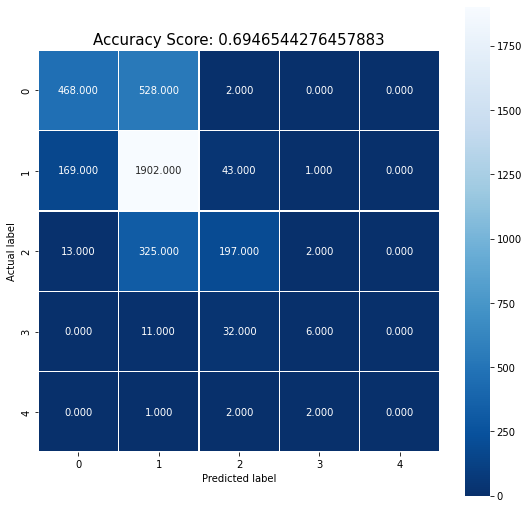

In [ ]:
clf_predictions = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, clf_predictions)
print(classification_report(y_test , clf_predictions, digits=4))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(clf.score(X_test , y_test))
plt.title(all_sample_title, size = 15);